<a href="https://colab.research.google.com/github/yashigupta02/tathastu_week_of_code/blob/master/Yashi_week5_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, LSTM
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [11]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.610315
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.678085
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.818838
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.952841
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.932299


In [5]:
print(df.dtypes)

High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Adj Close    float64
dtype: object


In [58]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2003.000000,2003.000000,2003.000000,2003.000000,2.003000e+03,2003.000000
mean,31.798525,31.238634,31.519792,31.527449,2.384275e+08,29.523361
std,12.507078,12.308627,12.398193,12.419818,1.875556e+08,12.795978
min,14.271429,13.753571,13.856071,13.947500,4.544800e+07,12.152316
25%,21.662499,21.228750,21.441607,21.492857,1.104316e+08,18.624002
50%,28.504999,27.915001,28.205000,28.230000,1.747996e+08,26.091917
75%,41.484999,40.531250,40.961250,40.992500,2.992836e+08,39.260998
max,70.442497,69.699997,69.892502,70.102501,1.506120e+09,69.177261


In [59]:
df.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [9]:
df.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')>

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2003 entries, 2012-01-03 to 2019-12-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2003 non-null   float64
 1   Low        2003 non-null   float64
 2   Open       2003 non-null   float64
 3   Close      2003 non-null   float64
 4   Volume     2003 non-null   float64
 5   Adj Close  2003 non-null   float64
dtypes: float64(6)
memory usage: 109.5 KB


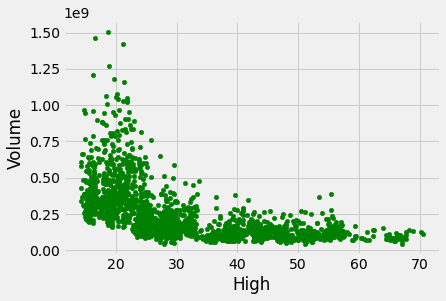

In [12]:
df.plot.scatter(x = 'High', y = 'Volume', c = 'green')

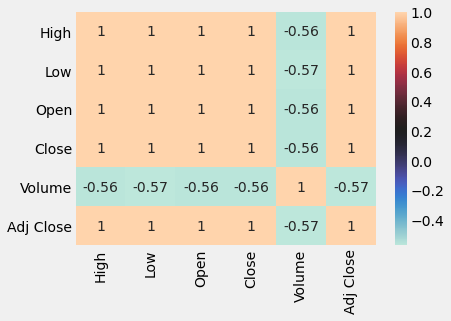

In [15]:
sns.heatmap(df.corr(), annot=True, cmap="icefire")
plt.show()

Observations 


*   Zero null values in the datasheet.



Text(0, 0.5, 'Close Price in Dollars')

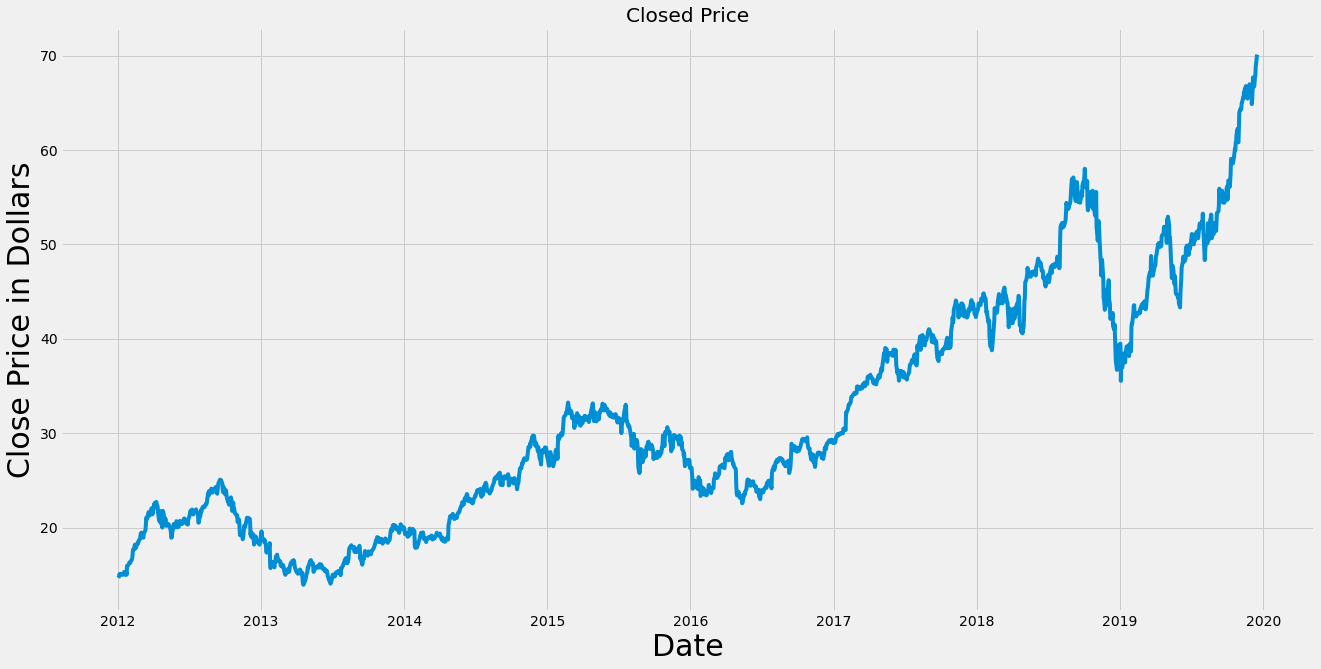

In [17]:
plt.figure(figsize=(20, 10))
plt.title('Closed Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Close Price in Dollars', fontsize=30)

Text(0, 0.5, 'Open Price in Dollars')

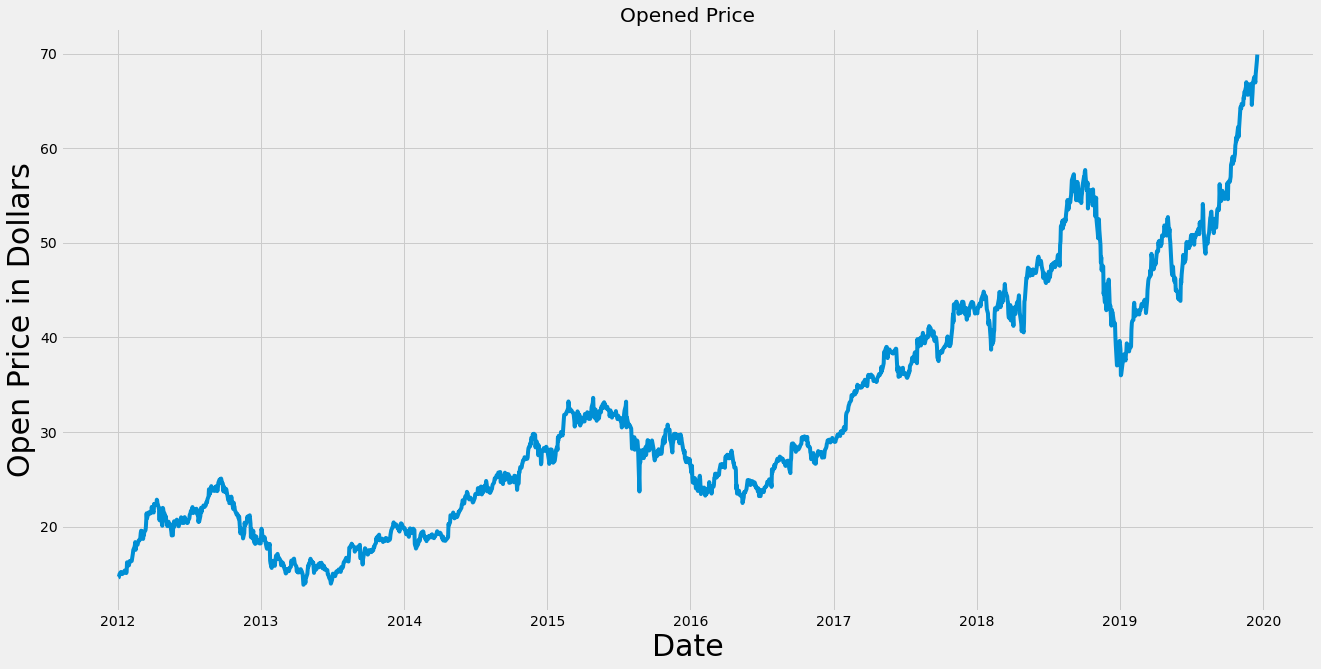

In [18]:
plt.figure(figsize=(20, 10))
plt.title('Opened Price')
plt.plot(df['Open'])
plt.xlabel('Date', fontsize=30)
plt.ylabel('Open Price in Dollars', fontsize=30)

In [19]:
data = df.filter(['Close'])
data2 = data.values
print(data2)

[[14.6867857 ]
 [14.76571369]
 [14.92964268]
 ...
 [68.78749847]
 [69.96499634]
 [70.10250092]]


In [20]:
training_data_size = math.ceil(len(data2)*.8)
training_data_size

1603

In [22]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data2)
print(scaled_data.shape)
print(scaled_data)

(2003, 1)
[[0.01316509]
 [0.01457063]
 [0.01748985]
 ...
 [0.97658263]
 [0.99755134]
 [1.        ]]


In [45]:
train_data = scaled_data[0:training_data_size, :]
print(len(train_data))
x_train, y_train = [], []
for i in range(100, len(train_data)):
    x_train.append(train_data[i-100:i, 0])
    y_train.append(train_data[i,0])
    if i<=100:
       print(x_train)
       print(y_train)
       print()

1603
[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805,
       0.13949272, 0.13293563, 0.14507041, 0.15186917, 0.14868284,
       0.15464214, 0.1562639 , 0.15130952, 0.14988489, 0.14770341,
       0.13654806, 0.12058461, 0.13939096, 0.13852602, 0

In [44]:
test_data = scaled_data[training_data_size:, :]
print(len(test_data))
x_test, y_test = [], []
for i in range(100, len(test_data)):
    x_test.append(test_data[i-100:i, 0])
    y_test.append(train_data[i,0])
    if i<=100:
       print(x_test)
       print(y_test)

400
[array([0.5840976 , 0.58107023, 0.58694685, 0.58485443, 0.59019677,
       0.58926183, 0.59117621, 0.58814884, 0.58636808, 0.58356332,
       0.59856648, 0.60564509, 0.61223397, 0.61521678, 0.61290181,
       0.60506631, 0.60297388, 0.60764846, 0.60061435, 0.60105957,
       0.59233369, 0.59188854, 0.57831003, 0.58191611, 0.5772861 ,
       0.574882  , 0.5626391 , 0.57270052, 0.57149854, 0.57746415,
       0.57572789, 0.58494342, 0.57043004, 0.57701893, 0.58846051,
       0.60008013, 0.5990562 , 0.58805984, 0.6020835 , 0.6034191 ,
       0.60154929, 0.60395332, 0.59927874, 0.6058677 , 0.60390882,
       0.60466565, 0.61085388, 0.61895648, 0.61624078, 0.60186089,
       0.59709732, 0.59878902, 0.64869556, 0.67491762, 0.67758883,
       0.68239696, 0.67367108, 0.67429435, 0.68155107, 0.6755409 ,
       0.68150651, 0.68542426, 0.68760575, 0.7013178 , 0.72028314,
       0.710845  , 0.70897512, 0.70901968, 0.71097855, 0.71396136,
       0.72188585, 0.72972128, 0.74432371, 0.75345025, 0.

In [46]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train.shape, y_train.shape)

(1503, 100, 1) (1503,)


In [47]:
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1], 1))
print(x_test.shape, y_test.shape)

(300, 100, 1) (300,)


In [48]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(25))
model.add(Dense(1))

In [49]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 25)                7600      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 26        
Total params: 38,226
Trainable params: 38,226
Non-trainable params: 0
_________________________________________________________________


In [51]:
lstm = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size= 64, epochs = 100, verbose=1)

Epoch 1/100
24/24 [==============================] - 11s 227ms/step - loss: 0.0161 - val_loss: 0.2411
Epoch 2/100
24/24 [==============================] - 4s 170ms/step - loss: 0.0011 - val_loss: 0.3801
Epoch 3/100
24/24 [==============================] - 4s 179ms/step - loss: 5.2710e-04 - val_loss: 0.3276
Epoch 4/100
24/24 [==============================] - 4s 164ms/step - loss: 4.5800e-04 - val_loss: 0.3256
Epoch 5/100
24/24 [==============================] - 4s 174ms/step - loss: 4.4768e-04 - val_loss: 0.3282
Epoch 6/100
24/24 [==============================] - 4s 167ms/step - loss: 4.5314e-04 - val_loss: 0.3233
Epoch 7/100
24/24 [==============================] - 4s 178ms/step - loss: 4.4835e-04 - val_loss: 0.3121
Epoch 8/100
24/24 [==============================] - 4s 174ms/step - loss: 4.2393e-04 - val_loss: 0.3271
Epoch 9/100
24/24 [==============================] - 4s 168ms/step - loss: 4.2677e-04 - val_loss: 0.3213
Epoch 10/100
24/24 [==============================] - 4s 180ms

In [52]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

In [53]:
train_pred = scaler.inverse_transform(train_pred)
test_pred = scaler.inverse_transform(test_pred)
print(train_pred.shape, test_pred.shape)

(1503, 1) (300, 1)


In [54]:
math.sqrt(mean_squared_error(y_train, train_pred))

28.44673596965661

In [55]:
math.sqrt(mean_squared_error(y_test, test_pred))

50.74204573964431

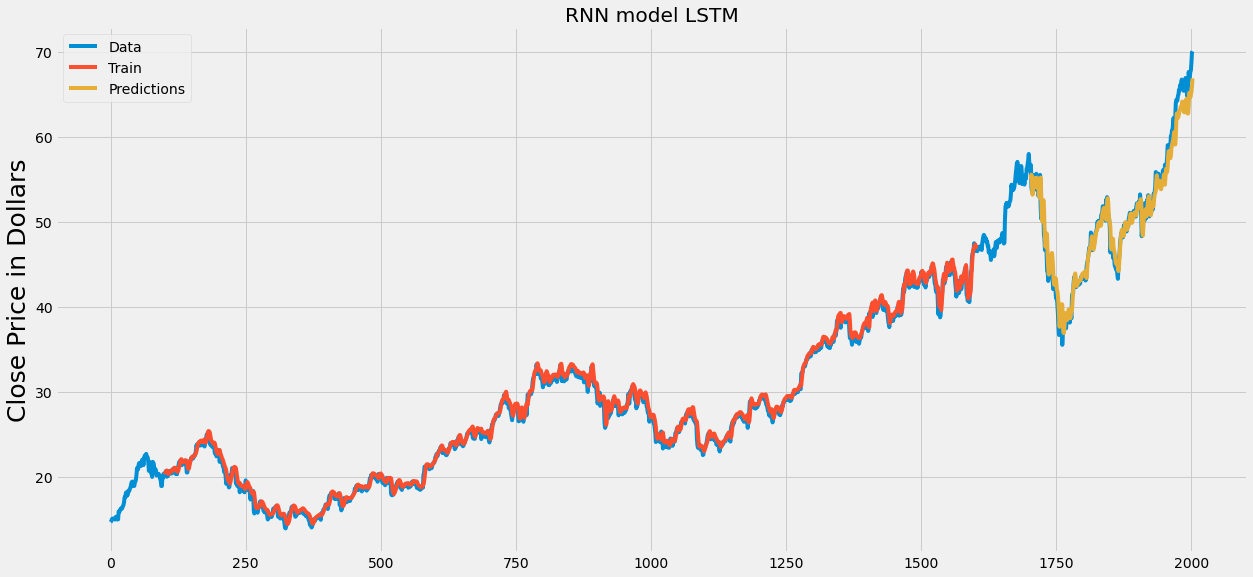

In [57]:
train_pred_plot = np.empty_like(data2)
train_pred_plot[:, :] = np.nan
train_pred_plot[100:len(train_pred)+100, :1] = train_pred
test_pred_plot = np.empty_like(data2)
test_pred_plot[:] = np.nan
test_pred_plot[len(train_pred)+(100*2):len(data2), :] = test_pred
plt.figure(figsize=(19,9))
plt.title('RNN model LSTM')
plt.ylabel('Close Price in Dollars', fontsize=25)
plt.plot(data2)
plt.plot(train_pred_plot)
plt.plot(test_pred_plot)
plt.legend(['Data', 'Train', 'Predictions'], loc='upper left')
plt.show()

Websites for reference


1.   Stack Over Flow
2.   Geek for Geeks

